## <b>■ 7장. 머신러닝</b>
    1. 파이썬으로 kNN 구현
    2. 파이썬으로 naiveBayes 구현
    3. 파이썬으로 의사결정트리 구현
    4. 파이썬으로 회귀분석 구현
    
    Kaggle 타이타닉의 정확도를 높이기 위해서 회귀분석이 사용되는 예
        나이의 결측치를 다른 값으로 치환할 때
            1. 최빈값
            2. 평균값
            3. 주변행으로 치환
            4. 호칭의 평균
            5. 나이를 회귀분석의 종속변수로 하고 다중회귀분석을 해서 나이의 결측치를 종속변수가 예측한 값으로 치환 (상위 2%)
            
### <b>■ 파이썬으로 회귀분석</b>
    1. 단순회귀분석
        독립변수 1개, 종속변수 1개 (선형 회귀선)
        예제: 7.1_simple_linear_regression.py
    2. 다항회귀분석
        독립변수 1개, 종속변수 1개 (비선형 회귀선)
        예제: 7.2_polynomial_regression.py
    3. 다중회귀분석
        종속변수에 영향을 주는 독립변수가 여러개인 경우
        예제: 7.3_multivariate_regression.py

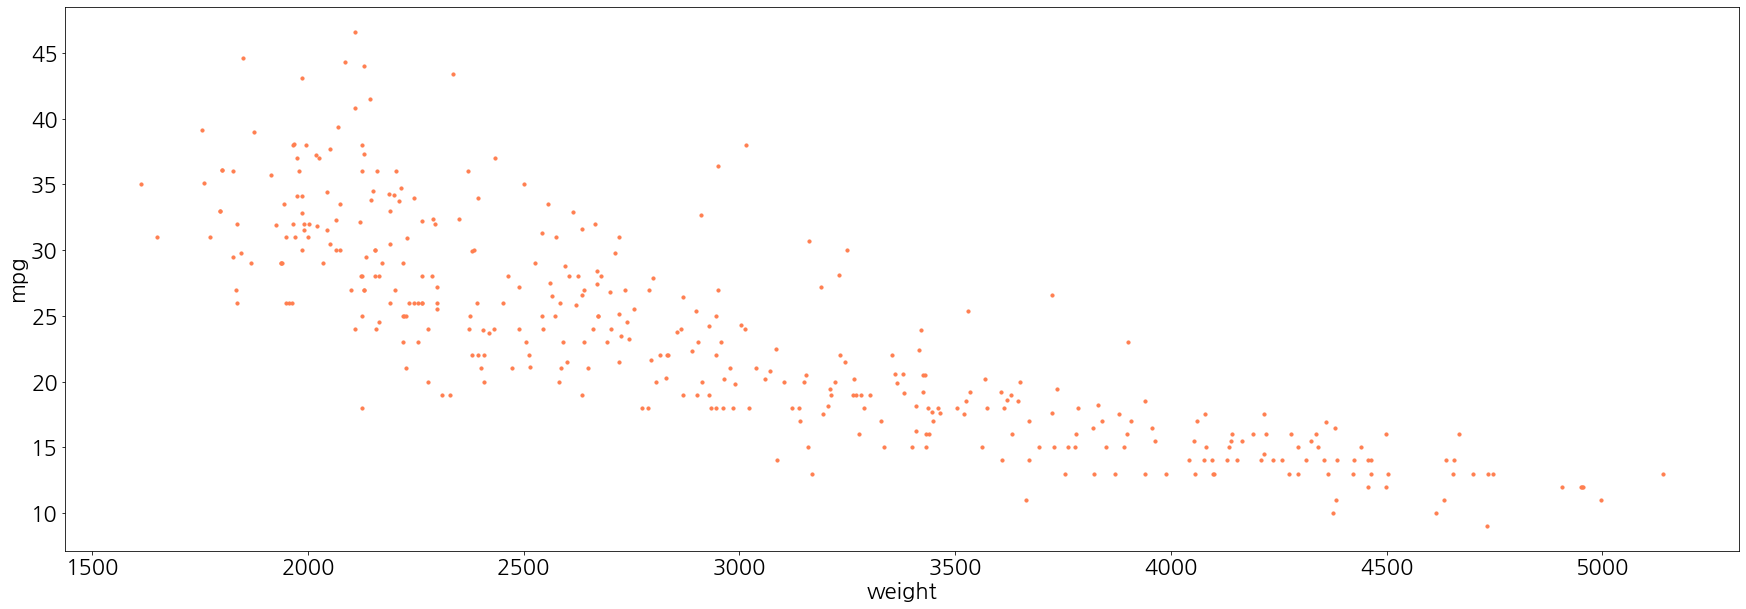

In [3]:
# -*- coding: utf-8 -*-

### 기본 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 10)
plt.rcParams["figure.figsize"] = (30,10)
plt.rcParams.update({'font.size': 22})
'''
[Step 1] 데이터 준비 - read_csv() 함수로 자동차 연비 데이터셋 가져오기
'''
# CSV 파일을 데이터프레임으로 변환
df = pd.read_csv('auto-mpg.csv', header=None)

# 열 이름 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 

df['horsepower'].replace('?', np.nan, inplace=True)      # '?'을 np.nan으로 변경
df.dropna(subset=['horsepower'], axis=0, inplace=True)   # 누락데이터 행을 삭제
df['horsepower'] = df['horsepower'].astype('float')      # 문자열을 실수형으로 변환

ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]
ndf.plot(kind='scatter', x='weight', y='mpg',  c='coral', s=10,)
plt.show()
plt.close()

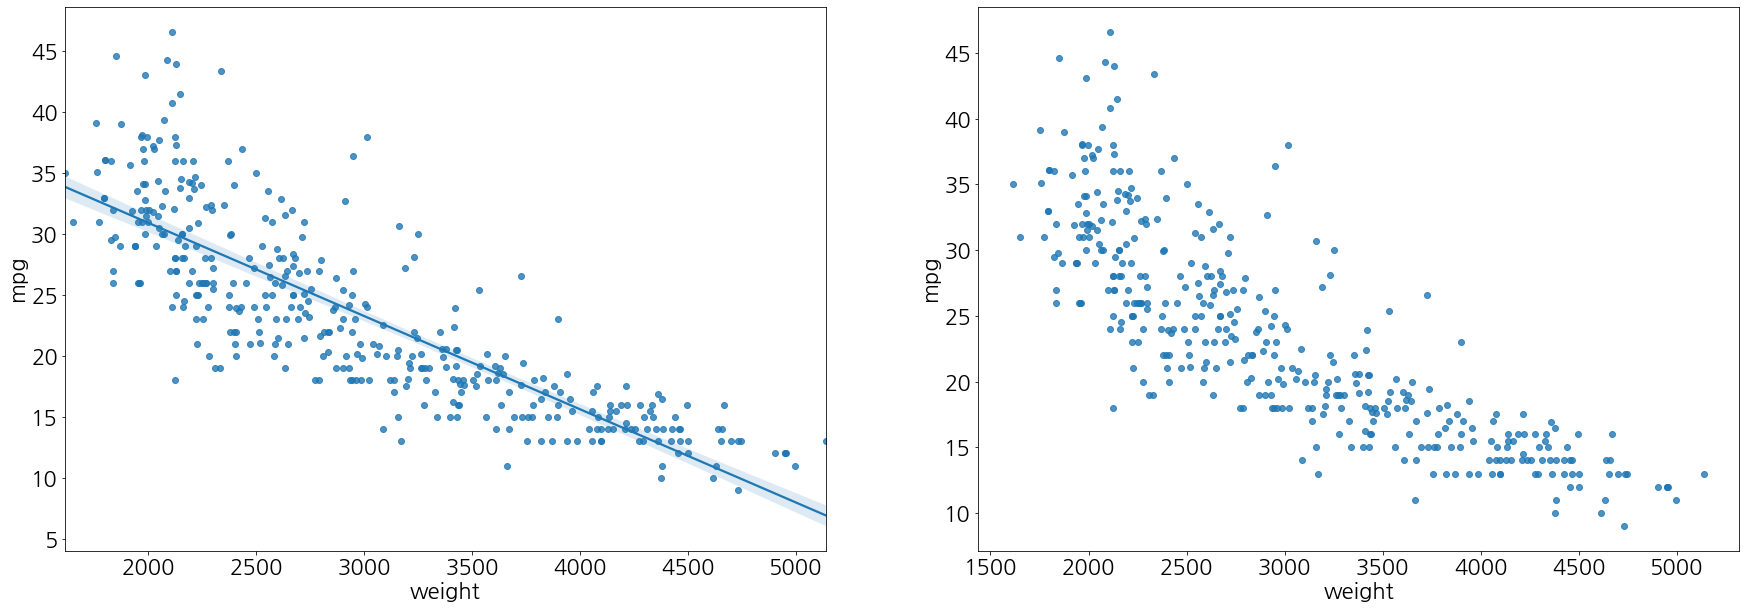

In [4]:
# seaborn으로 산점도 그리기
fig = plt.figure()   
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
sns.regplot(x='weight', y='mpg', data=ndf, ax=ax1)                 # 회귀선 표시
sns.regplot(x='weight', y='mpg', data=ndf, ax=ax2, fit_reg=False)  #회귀선 미표시
plt.show()
plt.close()

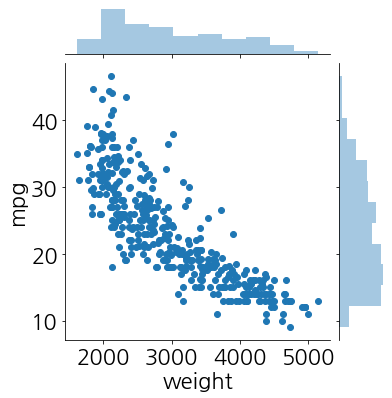

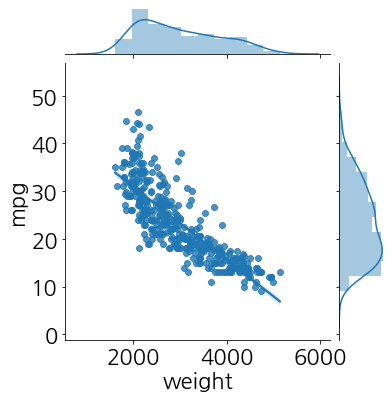

In [5]:
# seaborn 조인트 그래프 - 산점도, 히스토그램
sns.jointplot(x='weight', y='mpg', data=ndf)              # 회귀선 없음
sns.jointplot(x='weight', y='mpg', kind='reg', data=ndf)  # 회귀선 표시
plt.show()
plt.close()

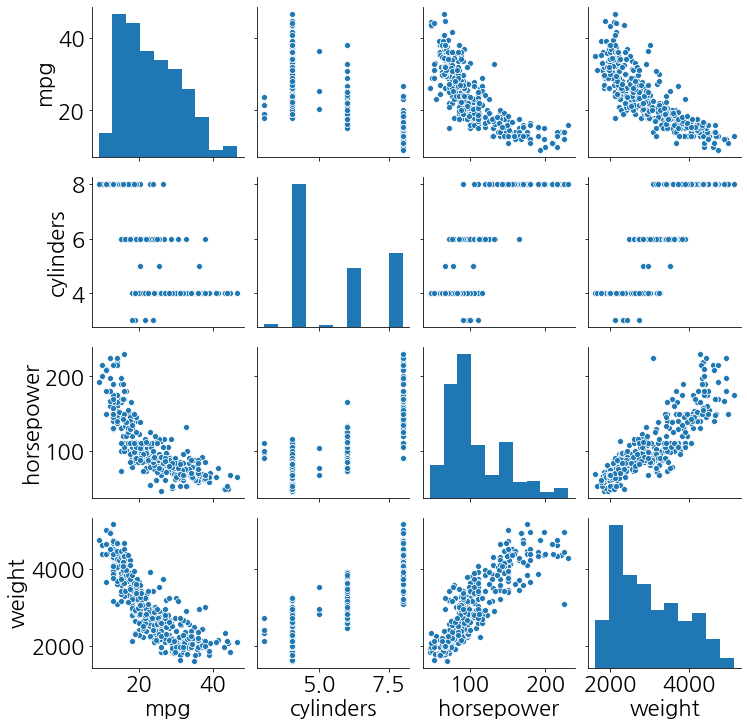

In [6]:
# seaborn pariplot으로 두 변수 간의 모든 경우의 수 그리기
sns.pairplot(ndf)  
plt.show()
plt.close()

    독립변수들간의 상관관계를 시각화하는 그래프
    그래프에서 horsepower와 weight이 mpg와 음의 상관관계를 보이고 있다.

0.6822458558299325


기울기 a:  [-0.00775343]


y절편 b 46.7103662572801




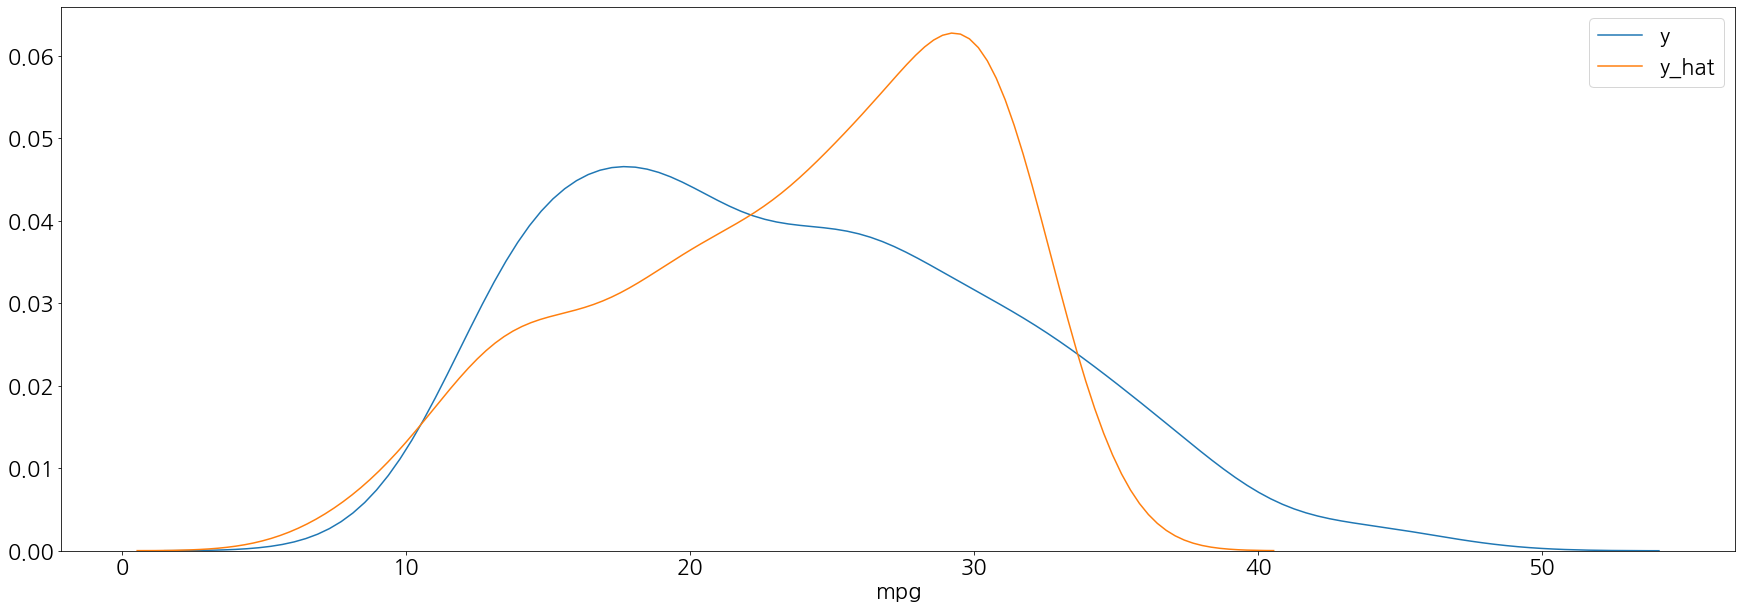

In [7]:
X=ndf[['weight']]  #독립 변수 X
y=ndf['mpg']       #종속 변수 Y

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,               #독립 변수 
                                                    y,               #종속 변수
                                                    test_size=0.3,   #검증 30%
                                                    random_state=10) #랜덤 추출 값 

# sklearn 라이브러리에서 선형회귀분석 모듈 가져오기
from sklearn.linear_model import LinearRegression 

# 단순회귀분석 모형 객체 생성
lr = LinearRegression().fit(X_train, y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
r_square = lr.score(X_test, y_test)
print(r_square)

# 회귀식의 기울기
print('기울기 a: ', lr.coef_)

# 회귀식의 y절편
print('y절편 b :', lr.intercept_)
print('\n')

# 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교 
y_hat = lr.predict(X)

plt.figure()
ax1 = sns.distplot(y, hist=False, label="y")
ax2 = sns.distplot(y_hat, hist=False, label="y_hat", ax=ax1)
plt.show()
plt.close()

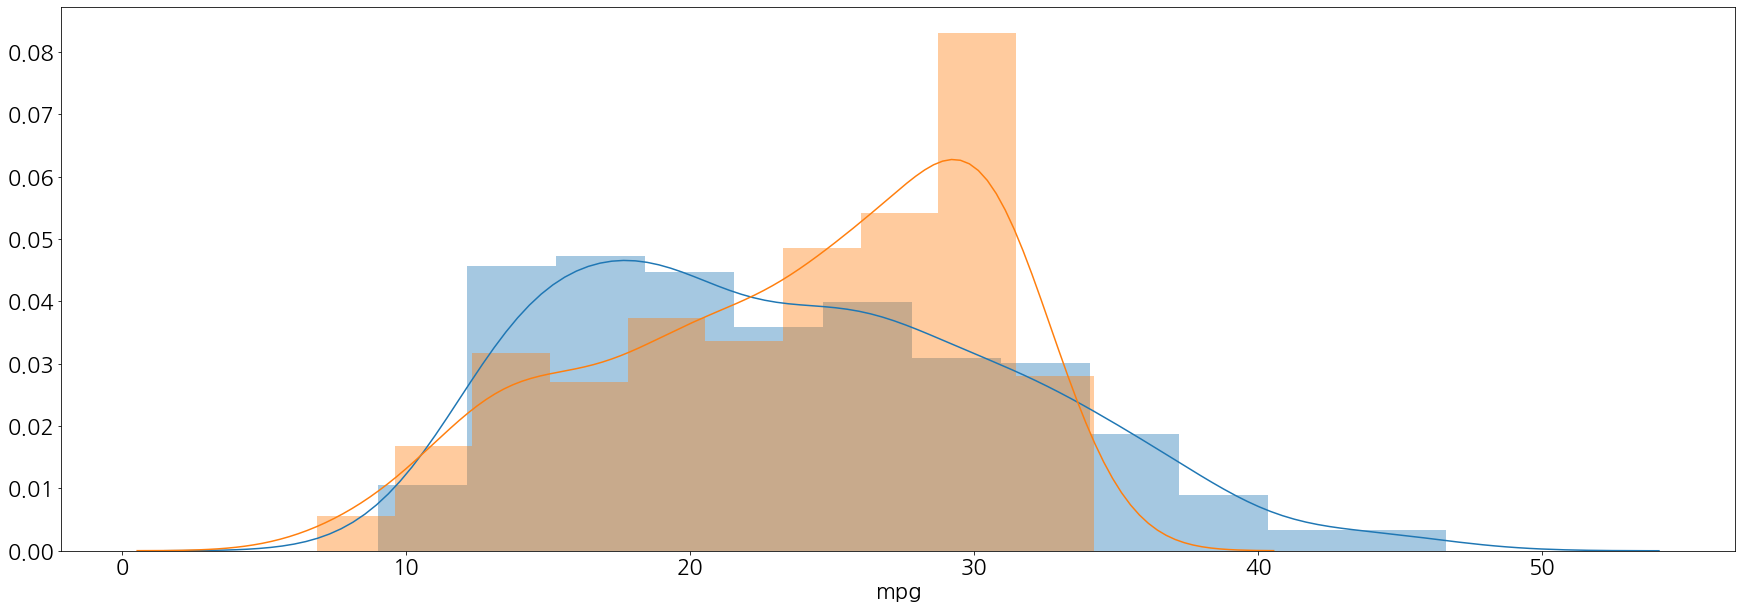

In [8]:
plt.figure()
ax1 = sns.distplot(y, hist=True, label="y")
ax2 = sns.distplot(y_hat, hist=True, label="y_hat", ax=ax1)
plt.show()
plt.close()

    단순회귀분석의 결과 그래프(무게, 연비간의 예측값과 관측값 비교)
        실제값은 왼쪽으로 편향, 예측값은 오른쪽으로 편향되는 경향
        따라서 독립변수(weight)와 종속변수(mpg)사이의 선형관계가 있지만 모형의 오차를 더 줄일 필요가 있음
        산포도를 보면 직선보다는 곡선이 더 적합해 보인다. 이런 경우 비 선형 회귀분석을 통해 모형의 정확도를 더 높일 수 있다.

### ※ 문제242. 체중과 키 데이터를 이용해서 단순선형회귀분석을 하고 결정계수를 출력하고 회귀식을 도출하시오
    몸무게 : 독립변수, 키 : 종속변수

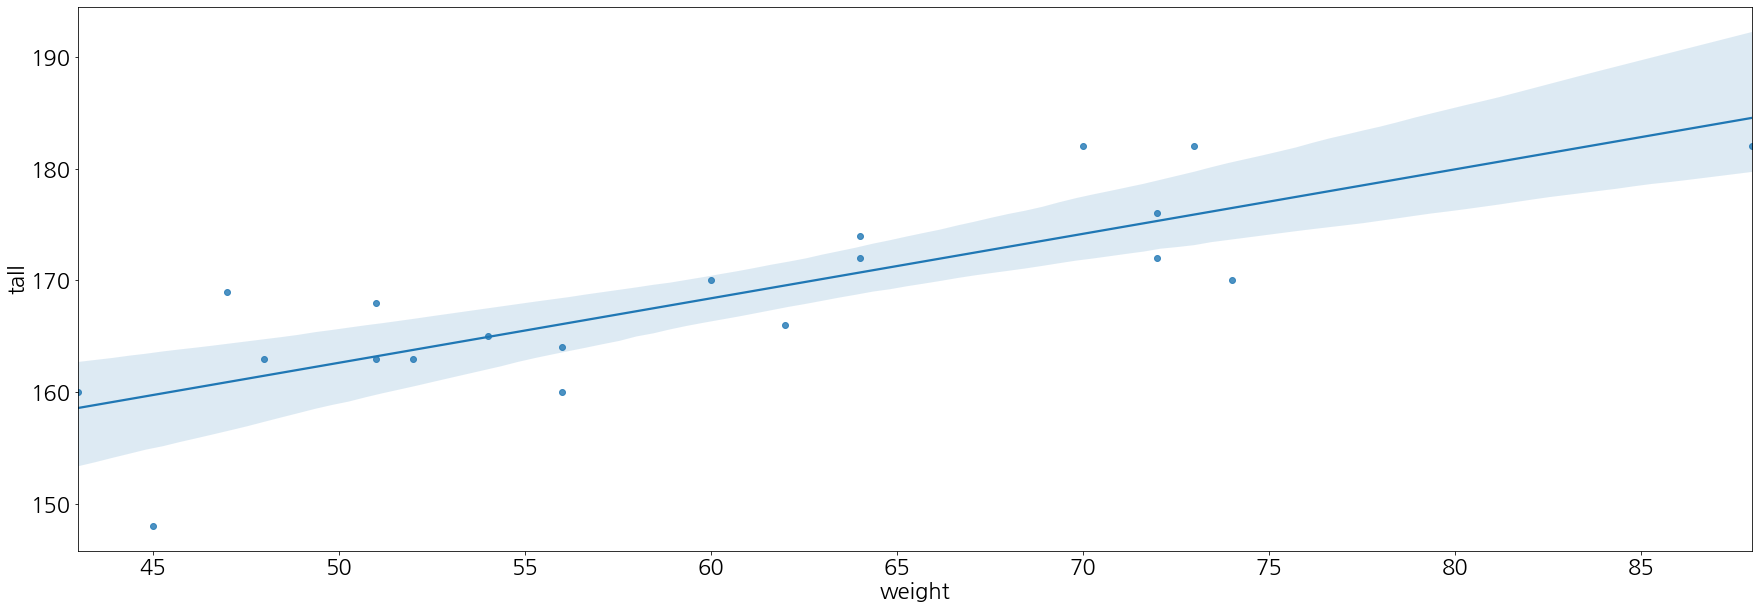

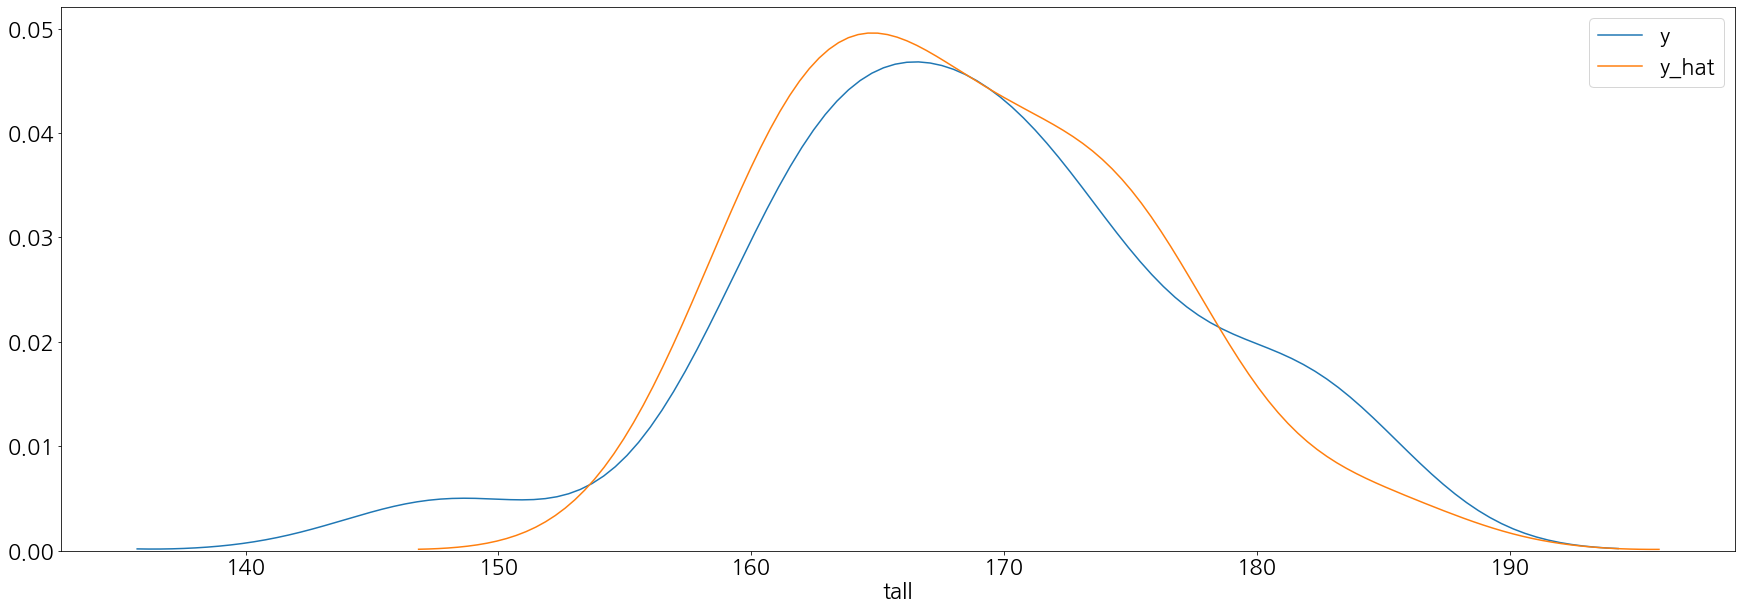

추정회귀식 : y_hat = 134.24730620357778+0.5667956899257245*weight


In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

weight=[ 72, 72, 70, 43, 48, 54, 51, 52, 73, 45, 60, 62, 64, 47, 51, 74, 88,64, 56, 56  ]
tall = [ 176, 172, 182, 160, 163, 165, 168, 163, 182, 148, 170, 166, 172, 169, 163, 170, 182, 174, 164, 160 ] 
dict_data = { 'weight' : [ 72, 72, 70, 43, 48, 54, 51, 52, 73, 45, 60, 62, 64, 47, 51, 74, 88, 64, 56, 56  ],
                  'tall' : [ 176, 172, 182, 160, 163, 165, 168, 163, 182, 148, 170, 166, 172, 169, 163, 170, 182, 174, 164, 160 ]   }

df = pd.DataFrame(dict_data)

# df.plot(kind='scatter',x='weight', y='tall')
sns.regplot(x='weight',y='tall',data=df)

X=df[['weight']]
y=df['tall']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=33)

from sklearn.linear_model import LinearRegression 
lr = LinearRegression().fit(X_train, y_train)
r_square = lr.score(X_test, y_test)

y_hat = lr.predict(X)

plt.figure()
ax1 = sns.distplot(y, hist=False, label="y")
ax2 = sns.distplot(y_hat, hist=False, label="y_hat", ax=ax1)
plt.show()
plt.close()

print(f"추정회귀식 : y_hat = {lr.intercept_}+{lr.coef_[0]}*weight")

### <b>■ 다항회귀분석</b>
    독립변수 x와 종속변수 y 사이의 선형의 상관관계가 있지만 직선보다는 곡선으로 설명하는 것이 적합할 때는 단순 회귀분석은 부적합
    다항 함수를 사용하면 복잡한 곡선 형태의 회귀선을 표현할 수 있다.

원 데이터:  (274, 1)
2차항 변환 데이터:  (274, 3)


0.7087009262975481




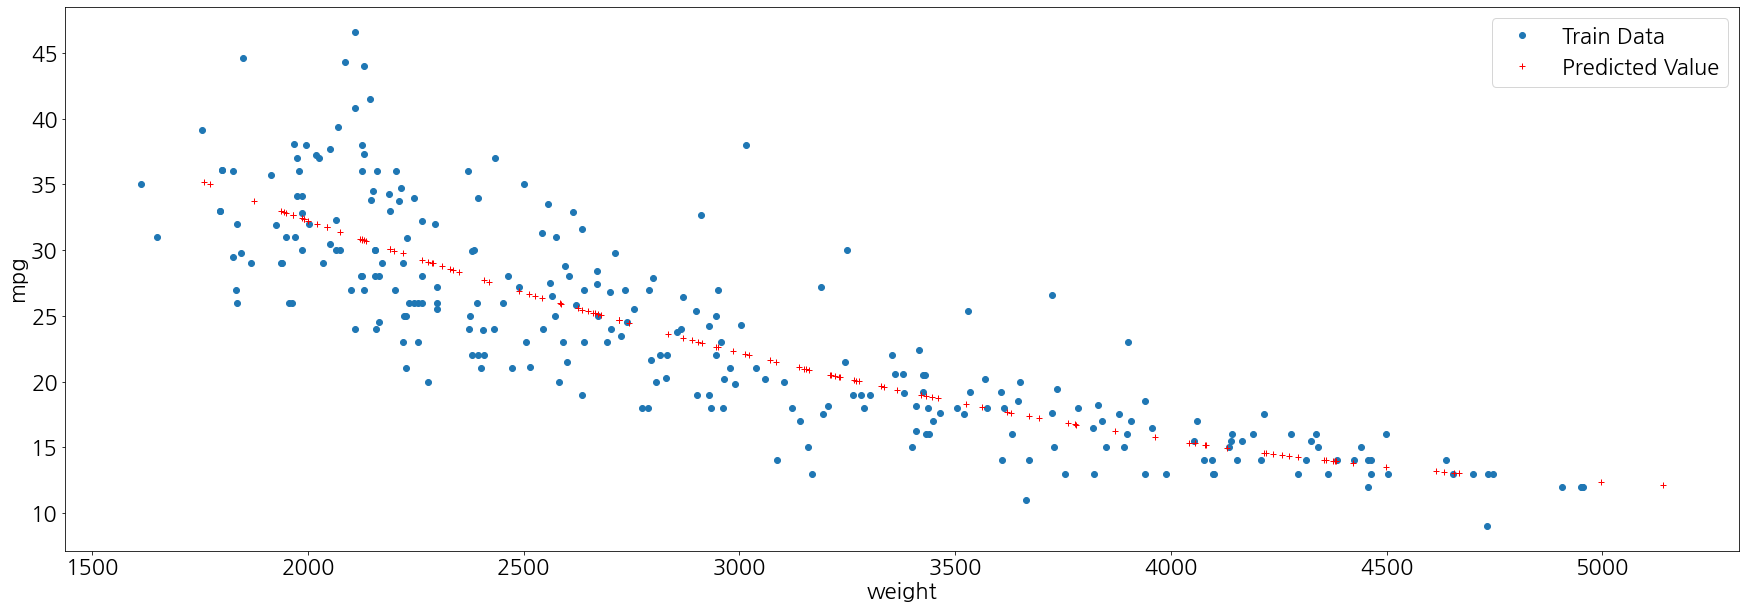

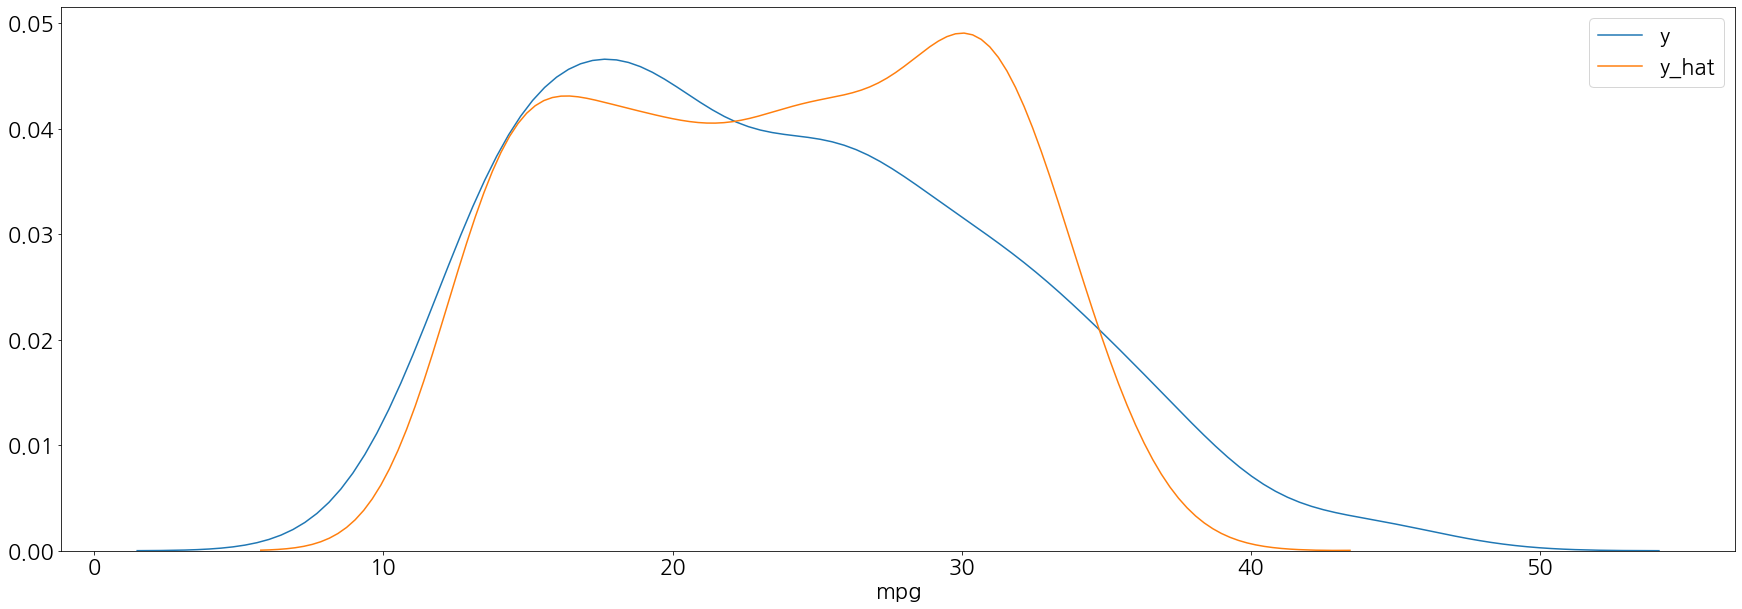

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('auto-mpg.csv', header=None)
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 

df['horsepower'].replace('?', np.nan, inplace=True)      # '?'을 np.nan으로 변경
df.dropna(subset=['horsepower'], axis=0, inplace=True)   # 누락데이터 행을 삭제
df['horsepower'] = df['horsepower'].astype('float')      # 문자열을 실수형으로 변환

ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]

X=ndf[['weight']]  #독립 변수 X
y=ndf['mpg']     #종속 변수 Y

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 

from sklearn.linear_model import LinearRegression      #선형회귀분석
from sklearn.preprocessing import PolynomialFeatures   #다항식 변환

# 다항식 변환 
poly = PolynomialFeatures(degree=2)               #2차항 적용
X_train_poly=poly.fit_transform(X_train)     #X_train 데이터를 2차항으로 변형

print('원 데이터: ', X_train.shape)
print('2차항 변환 데이터: ', X_train_poly.shape)  
print('\n')

# train data를 가지고 모형 학습
pr = LinearRegression().fit(X_train_poly, y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
X_test_poly = poly.fit_transform(X_test)       #X_test 데이터를 2차항으로 변형
r_square = pr.score(X_test_poly,y_test)
print(r_square)
print('\n')

# train data의 산점도와 test data로 예측한 회귀선을 그래프로 출력 
y_hat_test = pr.predict(X_test_poly)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(X_train, y_train, 'o', label='Train Data')  # 데이터 분포
ax.plot(X_test, y_hat_test, 'r+', label='Predicted Value') # 모형이 학습한 회귀선
ax.legend(loc='best')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()
plt.close()

# 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교 
X_ploy = poly.fit_transform(X)
y_hat = pr.predict(X_ploy)

plt.figure()
ax1 = sns.distplot(y, hist=False, label="y")
ax2 = sns.distplot(y_hat, hist=False, label="y_hat", ax=ax1)
plt.show()
plt.close()

### ※ 문제243. 체중과 키 데이터를 이용해서 다항 회귀분석을 하고 결정계수 및 회귀식 도출

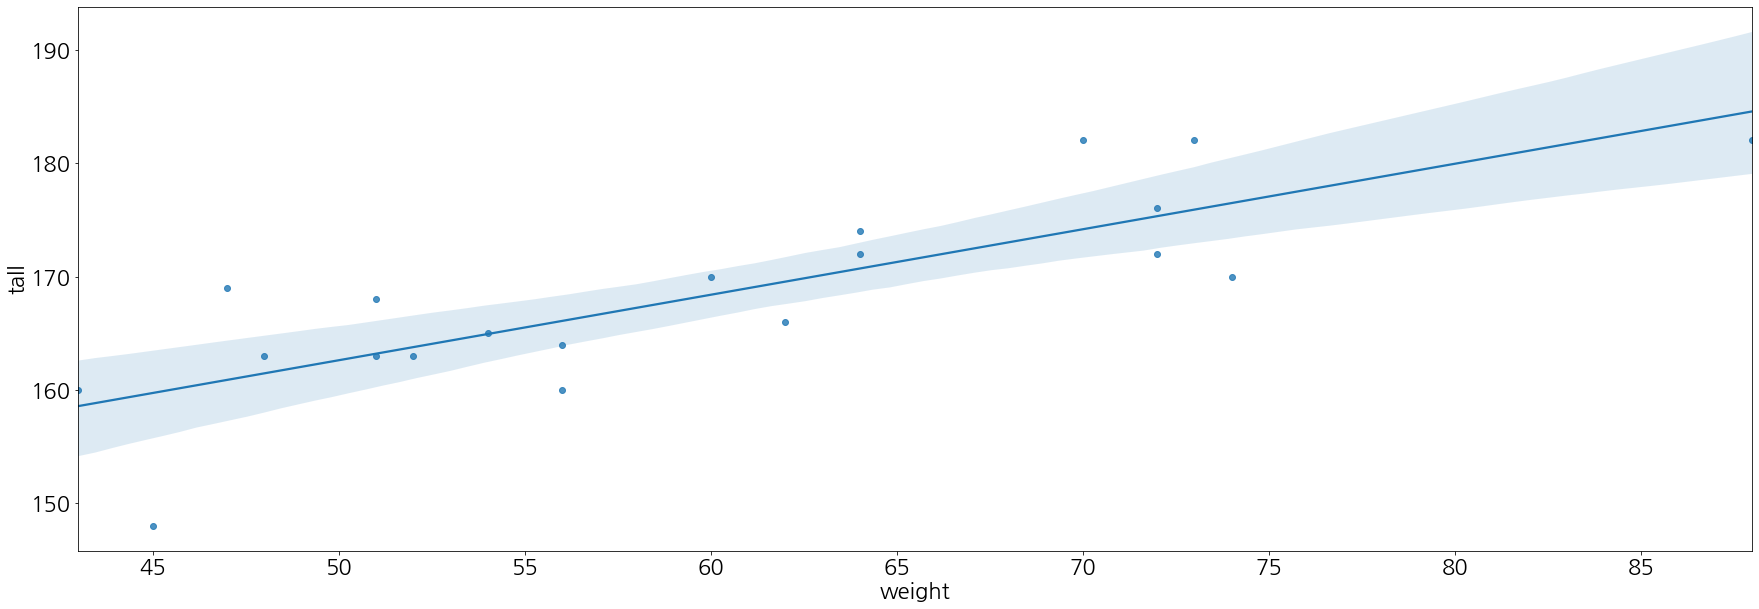

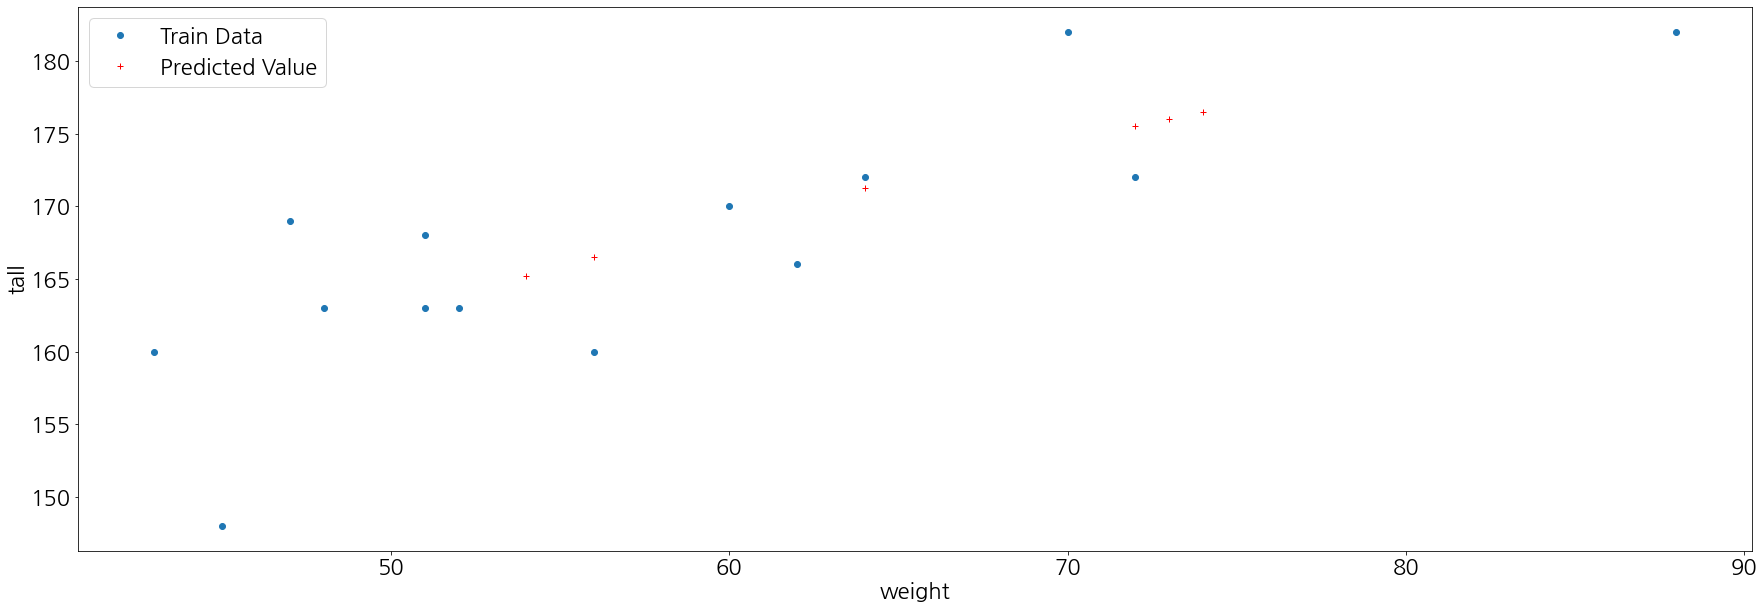

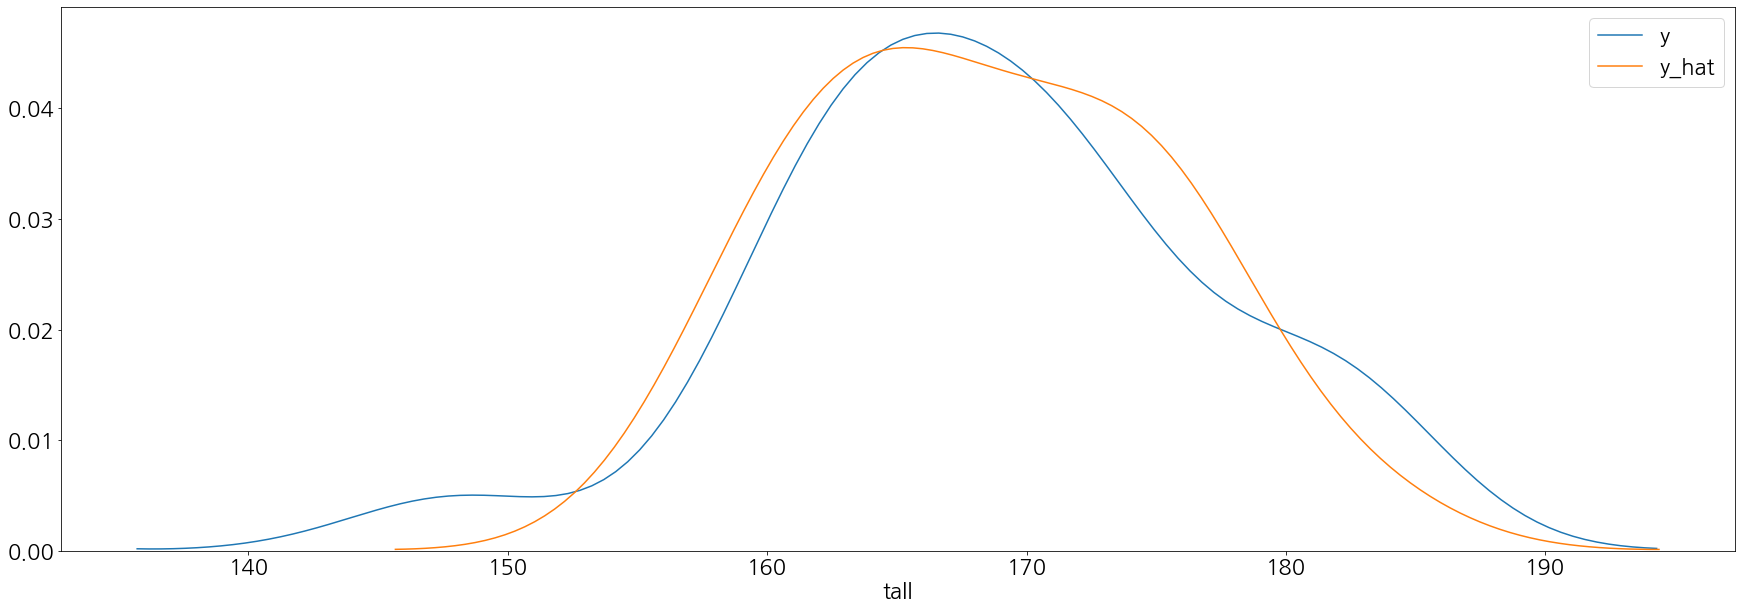

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

weight=[ 72, 72, 70, 43, 48, 54, 51, 52, 73, 45, 60, 62, 64, 47, 51, 74, 88,64, 56, 56  ]
tall = [ 176, 172, 182, 160, 163, 165, 168, 163, 182, 148, 170, 166, 172, 169, 163, 170, 182, 174, 164, 160 ] 
dict_data = { 'weight' : [ 72, 72, 70, 43, 48, 54, 51, 52, 73, 45, 60, 62, 64, 47, 51, 74, 88, 64, 56, 56  ],
                  'tall' : [ 176, 172, 182, 160, 163, 165, 168, 163, 182, 148, 170, 166, 172, 169, 163, 170, 182, 174, 164, 160 ]   }

df = pd.DataFrame(dict_data)

# df.plot(kind='scatter',x='weight', y='tall')
sns.regplot(x='weight',y='tall',data=df)

X=df[['weight']]
y=df['tall']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=33)

from sklearn.linear_model import LinearRegression     
from sklearn.preprocessing import PolynomialFeatures  

poly = PolynomialFeatures(degree=2)              
X_train_poly=poly.fit_transform(X_train)     
X_test_poly = poly.fit_transform(X_test)  
r_square = pr.score(X_test_poly,y_test)
pr = LinearRegression().fit(X_train_poly, y_train)

y_hat_test = pr.predict(X_test_poly)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(X_train, y_train, 'o', label='Train Data')  # 데이터 분포
ax.plot(X_test, y_hat_test, 'r+', label='Predicted Value') # 모형이 학습한 회귀선
ax.legend(loc='best')
plt.xlabel('weight')
plt.ylabel('tall')
plt.show()
plt.close()

# 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교 
X_ploy = poly.fit_transform(X)
y_hat = pr.predict(X_ploy)

plt.figure()
ax1 = sns.distplot(y, hist=False, label="y")
ax2 = sns.distplot(y_hat, hist=False, label="y_hat", ax=ax1)
plt.show()
plt.close()

### <b>■ 다중회귀분석</b>
    종속변수에 영향을 주는 독립변수가 여러개인 경우
    
    예제1. 미국 우주 왕복선 폭파원인
    예제2. 스마트폰 구매에 미치는 영향 분석
    예제3. 미국 대학교 입학 점수에 영향을 주는 과목 분석
    예제4. 미국 국민 의료비에 영향을 주는 요소 분석

#### 예제1. 미국 우주 왕복선 폭파원인
    o형링의 손상이 '온도', '압력', '비행기번호' 3가지 중에 어떤 것의 영향이 큰지 확인

In [37]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd

df = pd.read_csv('challenger.csv', engine='python', encoding='cp949')

model = smf.ols(formula = 'distress_ct ~ temperature+field_check_pressure+flight_num', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            distress_ct   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     3.563
Date:                Tue, 28 Jul 2020   Prob (F-statistic):             0.0337
Time:                        11:09:49   Log-Likelihood:                -17.308
No. Observations:                  23   AIC:                             42.62
Df Residuals:                      19   BIC:                             47.16
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                3.5271 

    o형링 파손에 영향을 주는 가장 큰 독립변수는 온도. 그 다음은 비행기 노후화를 나타내는 비행기번호이다.
$$회귀식 : \hat{y} = 3.5271-0.0514x_{1} + 0.0018x_{2} + 0.0143x_{3}$$<br>

    다중 회귀분석으로 가장 영향력있는 독립변수를 확인했으면 해당 독립변수와 종속변수간의 단순 회귀분석을 한다

### ※ 문제244. 온도와 o형링 파손간의 단순 회귀 분석을 하여 단순 회귀식을 도출하시오

In [38]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd

df = pd.read_csv('challenger.csv', engine='python', encoding='cp949')

model = smf.ols(formula = 'distress_ct ~ temperature', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            distress_ct   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     7.426
Date:                Tue, 28 Jul 2020   Prob (F-statistic):             0.0127
Time:                        11:18:22   Log-Likelihood:                -18.959
No. Observations:                  23   AIC:                             41.92
Df Residuals:                      21   BIC:                             44.19
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.6984      1.220      3.033      

    Intercept       3.6984
    temperature    -0.0475
    
$$ \hat{y} = 3.6984 -0.0475x_{1} $$
<center><b> $\hat{y}$ : 파손수<br>
    $x_{1}$ : 온도<br></b></center>
    
    화씨 30도에서 발사하는게 화씨 60도에서 발사하는 것 보다 3배 더 위험하고 화씨 70도에서 발사하는 것 보다 거의 7~8배 위험하다

### ※ 문제245. 미국 대학교 입학에 가장 영향을 미치는 과목이 무엇인지 파이썬을 활용한 회귀분석으로 알아내시오
    종속변수 : acceptance
    독립변수 : academic, sports, music
    데이터 : sports.csv

In [47]:
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd

df = pd.read_csv('sports.csv', engine='python', encoding='cp949')
print(df.describe())
print('\n')

# sns.pairplot(df)  
# plt.show()
# plt.close()

model = smf.ols(formula = 'acceptance ~ academic+sports+music', data=df).fit()
print(model.summary())
print('\n')

model_s = smf.ols(formula = 'acceptance ~ sports', data=df).fit()
print(model_s.summary())
print('\n')

model_a = smf.ols(formula = 'acceptance ~ academic', data=df).fit()
print(model_a.summary())

       Unnamed: 0    academic      sports       music  acceptance
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   40.311162   51.935185
std     57.879185   85.854236   14.846809   27.919293   19.323913
min      1.000000    0.700000    0.000000    0.818182    5.925926
25%     50.750000   74.375000    9.975000   16.636364   38.425926
50%    100.500000  149.750000   22.900000   32.181818   47.777778
75%    150.250000  218.825000   36.525000   65.962121   64.444444
max    200.000000  296.400000   49.600000  103.636364  100.000000


                            OLS Regression Results                            
Dep. Variable:             acceptance   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     634.8
Date:                Tue, 28 Jul 2020   Prob (F-statistic):          1.21e-100
Time:    

    정규화 미 시행 : sports 점수가 academic보다 더 영향력이 크다
    정규화 시행 : sports 보다 academic이 더 영향력이 크다

In [66]:
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd

df = pd.read_csv('sports.csv', engine='python', encoding='cp949')
# print(df.describe())
# print('\n')

# sns.pairplot(df)  
# plt.show()
# plt.close()

# model = smf.ols(formula = 'acceptance ~ academic+sports+music', data=df).fit()
# print(model.summary())
# print('\n')

# model_s = smf.ols(formula = 'acceptance ~ sports', data=df).fit()
# print(model_s.summary())
# print('\n')

# model_a = smf.ols(formula = 'acceptance ~ academic', data=df).fit()
# print(model_a.summary())

from sklearn.preprocessing import StandardScaler as ssc
scaler = ssc().fit(df)
data = scaler.transform(df) # 표준화
colname = df.columns # ['stud_id','academic','sports','acceptance']
data = pd.DataFrame(data,columns=colname)

model_stdd = smf.ols(formula = 'acceptance~academic+sports+music', data=data).fit()
print(model_stdd.summary())
print('\n')

model_stdd_a = smf.ols(formula = 'acceptance~academic', data=data).fit()
print(model_stdd_a.summary())

                            OLS Regression Results                            
Dep. Variable:             acceptance   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     634.8
Date:                Tue, 28 Jul 2020   Prob (F-statistic):          1.21e-100
Time:                        11:38:44   Log-Likelihood:                -46.609
No. Observations:                 200   AIC:                             101.2
Df Residuals:                     196   BIC:                             114.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.388e-17      0.022   6.36e-16      1.0

### ※ 문제246. (점심시간 문제) 미국 의료비 데이터를 내려받아 다중회귀분석을 하고 회귀분석 결과를 출력하시오

In [69]:
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd

df = pd.read_csv('insurance.csv', engine='python', encoding='cp949')
model = smf.ols(formula = 'expenses ~ age+sex+bmi+children+smoker', data=df).fit()
print(model.summary())
print('\n')

model_s = smf.ols(formula = 'expenses ~ smoker',data=df).fit()
print(model_s.summary())

                            OLS Regression Results                            
Dep. Variable:               expenses   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     798.1
Date:                Tue, 28 Jul 2020   Prob (F-statistic):               0.00
Time:                        12:08:52   Log-Likelihood:                -13551.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1332   BIC:                         2.714e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.206e+04    951.231    -12.673

    1. 남성은 여성에 비해서 매년 의료비가 $131 덜 들거라 예상된다.
2. 흡연자는 비흡연자보다 매년 의료비가 $23,850 더 들거라 예상된다.
    3. 나이가 일년씩 더해질 때 마다 평균적으로 의료비가 $256.8 더 들거라 예상된다.
4. 비만지수(bmi)가 증가할 때 마다 의료비가 $339 더 들거라 예상된다.
    5. 부양가족수가 한 명 늘어날 때 마다 $475 더 들거라 예상된다.
    6. 지역별로는 북동지역에 비해 북서, 남동, 남서에 대한 의료비 차이를 확인할 수 있다.
    

### ※ 문제247. 비만이면 의료비가 더 지출되는지 파생변수를 추가해서 확인하시오 
    bmi30 파생변수 추가, bmi가 30이상이면 1 아니면 0)

In [77]:
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd

df = pd.read_csv('insurance.csv', engine='python', encoding='cp949')

def func1(x):
    if x>=30:
        return 1
    else:
        return 0
df['bmi30'] = df['bmi'].apply(func1)

model = smf.ols(formula='expenses ~ bmi30+bmi+age+sex+children+smoker+region', data=df)
rs = model.fit()
print(rs.summary())

                            OLS Regression Results                            
Dep. Variable:               expenses   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     456.9
Date:                Tue, 28 Jul 2020   Prob (F-statistic):               0.00
Time:                        14:05:39   Log-Likelihood:                -13534.
No. Observations:                1338   AIC:                         2.709e+04
Df Residuals:                    1328   BIC:                         2.714e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -7657.5942   1

### ※ 문제249. 비만이면서 흡연을 하는 사람이 의료비가 더 많이 드는지 확인하시오

In [78]:
model = smf.ols(formula = 'expenses ~ age+sex+bmi+smoker+region+children+bmi30+bmi30*smoker', data=df)
rs = model.fit()
print(rs.summary())

                            OLS Regression Results                            
Dep. Variable:               expenses   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     842.1
Date:                Tue, 28 Jul 2020   Prob (F-statistic):               0.00
Time:                        14:05:44   Log-Likelihood:                -13144.
No. Observations:                1338   AIC:                         2.631e+04
Df Residuals:                    1327   BIC:                         2.637e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -4740.6822    

### ※ 문제250. seaborn의 타이타닉 데이터를 회귀분석하여 종속변수를 예측하는데 종속변수를 age(나이)로 하고 회귀분석 하시오

In [102]:
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd

df = sns.load_dataset('titanic')

mask = (df.age<10) | (df.sex=='female') 
df['women_child'] = mask.astype(int)

rdf = df.drop(['deck','embark_town'], axis =1)
rdf = rdf.dropna( subset=['age'], how='any', axis=0)

most_freq = rdf['embarked'].value_counts().idxmax()
rdf['embarked'].fillna(most_freq, inplace = True)

ndf = rdf[['survived','pclass','sex','age','sibsp','parch','embarked','women_child']]

gender = pd.get_dummies(ndf['sex'])
ndf = pd.concat([ndf,gender], axis= 1)
onehot_embarked = pd.get_dummies(ndf['embarked'])
ndf = pd.concat([ndf,onehot_embarked],axis=1)
ndf.drop(['sex','embarked'], axis=1, inplace = True)

x = ndf[ ['pclass', 'survived' ,'sibsp', 'parch' ,'female' ,'male', 'C' ,'Q' ,'S', 'women_child'] ]
y = ndf['age'] # 종속변수

from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(x).transform(x)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()   

lr.fit(X, y)

y_hat = lr.predict(X)
y_hat

array([27.06905616, 31.83681887, 22.58681887, 34.08681887, 29.56905616,
       43.63155616,  0.43056887, 22.46181887, 24.83681887, 20.02431887,
       36.64931887, 29.56905616, 26.75655616, 26.71181887, 29.58681887,
        2.18056887, 24.21181887, 36.60030616, 32.47530616, 26.86806887,
       39.50655616, 19.08681887, 19.77431887, 35.94405616, 41.38155616,
       36.60030616, 38.81905616, 41.10030616, 29.56905616, 21.71181887,
       17.83681887, 24.21181887, 31.21181887, 24.71181887, 26.86806887,
       24.21181887, -2.10068113, 29.56905616, 31.83681887, 27.08681887,
       41.31905616, 29.58681887, 27.31905616, 26.96181887, 16.85030616,
       27.31905616, 36.64931887, 41.10030616,  0.36806887, 29.58681887,
       29.56905616, 12.39931887, 24.53780616, 36.60030616, 14.02431887,
       36.60030616, 24.81905616, 25.44405616, 29.56905616, 10.80556887,
       22.58681887, 29.56905616, 25.44405616, 43.63155616, 29.58681887,
       15.02431887, 26.88155616, 28.96181887, 29.56905616, 29.56

### ※ 문제251. seaborn 타이타닉의 나이 결측치를 다중 회귀분석의 예상값으로 치환하고서 생존자를 예측하는 의사결정트리 모델의 정확도를 확인하시오

In [101]:
import seaborn as sns
abs_age = pd.DataFrame({'abg_age':y_hat})
abs_age.mean()

tt = sns.load_dataset('titanic')

rdf = tt.drop(['deck', 'embark_town'], axis=1)

# freq = rdf['age'].value_counts(dropna=True).idxmax()
rdf['age'].fillna(abs_age.mean(), inplace=True)
rdf.isnull().sum()

survived        0
pclass          0
sex             0
age           177
sibsp           0
parch           0
fare            0
embarked        2
class           0
who             0
adult_male      0
alive           0
alone           0
dtype: int64

In [100]:
ndf = rdf[['survived', 'pclass', 'sex', 'age','sibsp', 'parch', 'embarked']]
gender = pd.get_dummies(ndf['sex'])

ndf = pd.concat([ndf, gender], axis=1)
onehot_embarked = pd.get_dummies(ndf['embarked'], prefix='town')

ndf = pd.concat([ndf, onehot_embarked], axis=1)
ndf.drop(['sex', 'embarked'], axis=1, inplace=True)

X = ndf[['pclass', 'age', 'sibsp', 'parch', 'female', 'male', 'town_C', 'town_Q', 'town_S']]
y = ndf['survived']
X.iloc[886:890]

,pclass,age,sibsp,parch,female,male,town_C,town_Q,town_S
886,2,27.0,0,0,0,1,0,0,1
887,1,19.0,0,0,1,0,0,0,1
888,3,NaN,1,2,1,0,0,0,1
889,1,26.0,0,0,0,1,1,0,0


In [96]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

X

array([[ 0.82737724, -0.53037664,  0.43279337, ..., -0.48204268,
        -0.30756234,  0.61930636],
       [-1.56610693,  0.57183099,  0.43279337, ...,  2.0745051 ,
        -0.30756234, -1.61470971],
       [ 0.82737724, -0.25482473, -0.4745452 , ..., -0.48204268,
        -0.30756234,  0.61930636],
       ...,
       [ 0.82737724,         nan,  0.43279337, ..., -0.48204268,
        -0.30756234,  0.61930636],
       [-1.56610693, -0.25482473, -0.4745452 , ...,  2.0745051 ,
        -0.30756234, -1.61470971],
       [ 0.82737724,  0.15850313, -0.4745452 , ..., -0.48204268,
         3.25137334, -1.61470971]])

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 

from sklearn import tree
tree_model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
tree_model.fit(X_train, y_train)
y_hat = tree_model.predict(X_test) 

from sklearn import metrics 
tree_matrix = metrics.confusion_matrix(y_test, y_hat) 
print(tree_matrix)
print('\n')

tree_report = metrics.classification_report(y_test, y_hat) 
print(tree_report)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').